In [4]:
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
df = pd.read_csv('large_arena_preds_df.csv')

In [3]:
df = df[df['pred'] == True]

In [5]:
str(df.shape[0]) + ' videos'

'1310 videos'

In [6]:
for index, row in df.iterrows():
    if index == 0:
        continue
    animal_id = row['vid'].split('_')[3]
    df.at[index, 'animal id'] = animal_id

    month, day, year = row['session'][:2], row['session'][2:4], row['session'][4:6]
    df.at[index, 'month'] = month
    df.at[index, 'day'] = day
    df.at[index, 'year'] = year

In [7]:
unique_ids = set(df['animal id'])

In [8]:
id_dates = {}
for ids in unique_ids:
    id_df = df[df['animal id'] == ids]
    id_df = id_df.sort_values(by=['year', 'month', 'day'])

    first_date = str(id_df.head(1)['session']).split()[1]
    last_date = str(id_df.tail(1)['session']).split()[1]

    id_dates[ids] = (first_date, last_date)

In [9]:
# nan values are counted as NOT being in the center ALWAYS, so if there are a lot of nan values this will mean a lot of values not in the center!!
# show nan time, center time, not center time!!

In [10]:
from utils import get_per_center, get_per_corners, get_per_walls

In [ ]:
center_df = pd.DataFrame(columns=['animal id', 'first date', 'last date'])
ind = 0
for animal_id, values in id_dates.items():
    center_df.at[ind, 'animal id'] = animal_id
    
    for i, date in enumerate(values):
        row = df[(df['animal id'] == animal_id) & (df['session'] == date)]
        session = str(row['session']).split()[1]
        vid = str(row['vid']).split()[1]
        with h5py.File(f'/gpfs/radev/pi/saxena/aj764/Training_LARGEARENA_Individual/{session}/Tracking/h5_not_corrected/' + vid + 'predictions.h5','r') as f:
            locations = f["tracks"][:].T
            node_names = [n.decode() for n in f["node_names"][:]]
        
        center_time, not_center_time, nan_time, norm_center, norm_not_center = get_dist(method, locations)
        if i == 0:
            center_df.at[ind, 'first center'] = center_time
            center_df.at[ind, 'first not center'] = not_center_time
            center_df.at[ind, 'first nan'] = nan_time
            center_df.at[ind, 'first norm center'] = norm_center
            center_df.at[ind, 'first norm not center'] = norm_not_center
            center_df.at[ind, 'first date'] = date
            center_df.at[ind, 'first nose'] = np.sum(np.isnan(locations[:, 0, :, :])) / np.prod(locations[:, 0, :, :].shape)
            center_df.at[ind, 'first head'] = np.sum(np.isnan(locations[:, 3, :, :])) / np.prod(locations[:, 3, :, :].shape)
        else:
            center_df.at[ind, 'last center'] = center_time
            center_df.at[ind, 'last not center'] = not_center_time
            center_df.at[ind, 'last nan'] = nan_time
            center_df.at[ind, 'last norm center'] = norm_center
            center_df.at[ind, 'last norm not center'] = norm_not_center
            center_df.at[ind, 'last date'] = date
            center_df.at[ind, 'last nose'] = np.sum(np.isnan(locations[:, 0, :, :])) / np.prod(locations[:, 0, :, :].shape)
            center_df.at[ind, 'last head'] = np.sum(np.isnan(locations[:, 3, :, :])) / np.prod(locations[:, 3, :, :].shape)

    ind += 1        
         

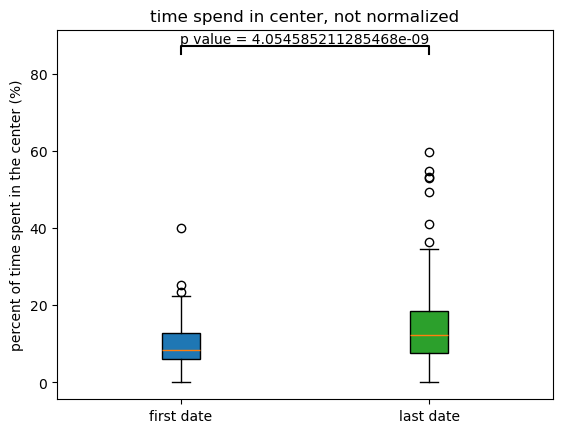

In [146]:
labels = ['first date', 'last date']
colors = ['tab:blue', 'tab:green']
fig, ax = plt.subplots()
ax.set_ylabel('percent of time spent in the center (%)')
bplot = ax.boxplot([center_df['first center'], center_df['last center']], patch_artist=True, tick_labels=labels)
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

t_stat, p_value = stats.ttest_ind(center_df['first center'].astype(float), center_df['last center'].astype(float))
x1, x2 = 1, 2
y, h = 85, 2 
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, color='k')
# plt.text((x1+x2)*.5, y+h, 'p value = ' + "{:.8f}".format(float(p_value)), ha='center', va='bottom', color='k')
plt.text((x1+x2)*.5, y+h, 'p value = ' + str(p_value), ha='center', va='bottom', color='k')
plt.title('time spend in center, not normalized')

plt.show()
plt.savefig(f'graphs/non-normal{method}.png')

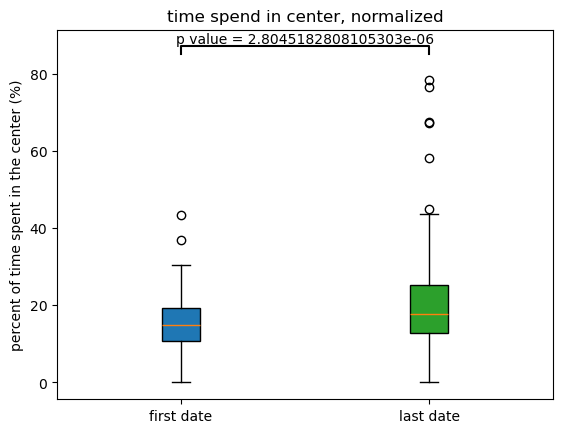

In [145]:
labels = ['first date', 'last date']
colors = ['tab:blue', 'tab:green']
fig, ax = plt.subplots()
ax.set_ylabel('percent of time spent in the center (%)')
bplot = ax.boxplot([center_df['first norm center'], center_df['last norm center']], patch_artist=True, tick_labels=labels)
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

t_stat, p_value = stats.ttest_ind(center_df['first norm center'].astype(float), center_df['last norm center'].astype(float))
x1, x2 = 1, 2
y, h = 85, 2 
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, color='k')
# plt.text((x1+x2)*.5, y+h, 'p value = ' + "{:.8f}".format(float(p_value)), ha='center', va='bottom', color='k')
plt.text((x1+x2)*.5, y+h, 'p value = ' + str(p_value), ha='center', va='bottom', color='k')
plt.title('time spend in center, normalized')

plt.show()

In [12]:
# things to check with Will

# calculating distance from nose point (could do it from other body point too)
# what the arbitrary distance from the wall or center should be to dilineate being in the center or not
# if we should measure the distance from the center or from the wall


## Example

In [5]:
import sys
sys.path.append('../../../')

In [3]:
from src.utils.error_utils import high_vel_nan

In [4]:
# locations = high_vel_nan(locations)

In [6]:
session = '010725'
vid = '010725_PVTRAIN_LARGEARENA_NM026G_Camera2'

# session = '031725'
# vid = '031725_ISTRAIN_LARGEARENA_NM027Y_Camera2'

In [7]:
with h5py.File(f'/gpfs/radev/pi/saxena/aj764/Training_LARGEARENA_Individual/{session}/Tracking/h5_not_corrected/' + vid + 'predictions.h5','r') as f:
    locations = f["tracks"][:].T

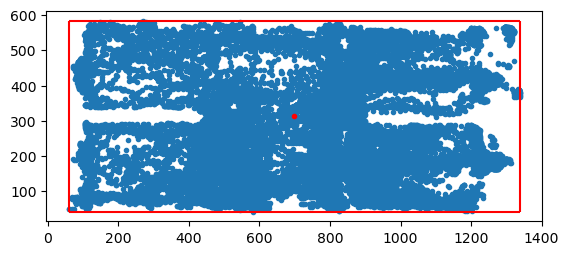

In [7]:
# find walls
xmin, xmax = np.nanmin(locations[:, 0, 0, :]), np.nanmax(locations[:, 0, 0, :])
ymin, ymax = np.nanmin(locations[:, 0, 1, :]), np.nanmax(locations[:, 0, 1, :])
sides = [xmin, xmax, ymin, ymax]
# find center
center_x, center_y = ((xmax - xmin) / 2) + xmin, ((ymax - ymin) / 2) + ymin

plt.plot(locations[:, 0, 0, :], locations[:, 0, 1, :], '.')
plt.hlines(ymin, xmin, xmax, color='r')
plt.hlines(ymax, xmin, xmax, color='r')
plt.vlines(xmin, ymin, ymax, color='r')
plt.vlines(xmax, ymin, ymax, color='r')
plt.gca().set_aspect("equal")
plt.plot(center_x, center_y, '.', color='r')

In [2]:
from utils import get_dist

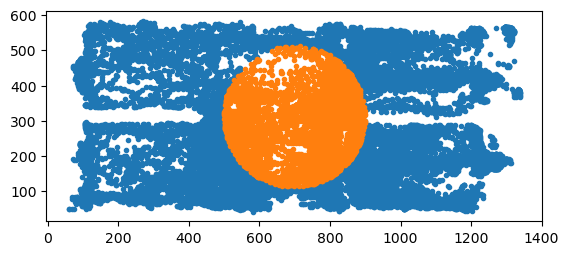

In [9]:
center_time, not_center_time, nan_time, norm_center, norm_not_center = get_dist('center', locations)

In [46]:
center_time, not_center_time, nan_time, norm_center, norm_not_center

(69.3, 4.3, 26.4, 94.15760869565217, 5.842391304347826)

In [47]:
center_dist = np.sqrt((locations[:, node, 0, 0] - center_x)**2 + (locations[:, node, 1, 0] - center_y)**2)

In [51]:
in_center = [i for i,x in enumerate(center_dist) if x < 200 and not np.isnan(x)]

In [52]:
round(100 * len(in_center) / len(center_dist), 2)

12.63

calculate by distance from center:
rat spent 12.63% of the time in the center of the arena


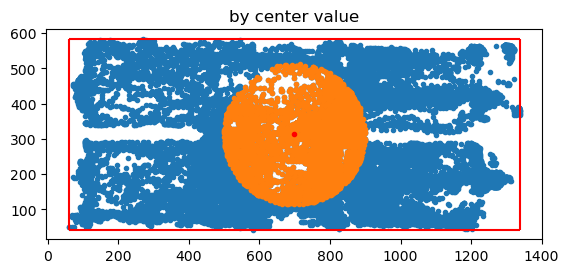

In [54]:
# by the center value
in_center = [i for i,x in enumerate(center_dist) if x < 200]
center_time = round(100 * len(in_center) / len(center_dist), 2)
print("calculate by distance from center:")
print(f'rat spent {center_time}% of the time in the center of the arena')

plt.plot(locations[:, 0, 0, :], locations[:, 0, 1, :], '.')
plt.plot(locations[in_center, 0, 0, :], locations[in_center, 0, 1, :], '.')
# find walls
xmin, xmax = np.nanmin(locations[:, 0, 0, :]), np.nanmax(locations[:, 0, 0, :])
ymin, ymax = np.nanmin(locations[:, 0, 1, :]), np.nanmax(locations[:, 0, 1, :])
sides = [xmin, xmax, ymin, ymax]
# find center
center_x, center_y = ((xmax - xmin) / 2) + xmin, ((ymax - ymin) / 2) + ymin

plt.hlines(ymin, xmin, xmax, color='r')
plt.hlines(ymax, xmin, xmax, color='r')
plt.vlines(xmin, ymin, ymax, color='r')
plt.vlines(xmax, ymin, ymax, color='r')
plt.plot(center_x, center_y, '.', color='r')
plt.gca().set_aspect("equal")

_ = plt.title('by center value')

In [23]:
MAXDIST = 100 # this is the value that makes them pretty equal! but is arbitrary

calculate by distance from wall:
rat spent 77.26% of the time in the center of the arena
0.263976528274587
calculate by distance from wall:
rat spent 56.86% of the time in the center of the arena


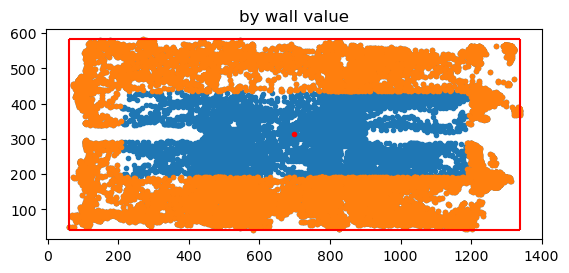

In [36]:
# by the wall value
nan_vals = np.sum(np.isnan(locations[:, 0, :, :])) / np.prod(locations[:, 0, :, :].shape)
# min_wall_dist = min_wall_dist[~np.isnan(min_wall_dist)]
in_center = [i for i,x in enumerate(min_wall_dist) if x < MAXDIST and not np.isnan(x)]
not_center = [i for i,x in enumerate(min_wall_dist) if x > MAXDIST and not np.isnan(x)]

# in_center = in_center[~np.isnan(min_wall_dist)]
# in_center = in_center[~np.isnan(in_center)]

center_time = round(100 * len(in_center) / len(min_wall_dist[~np.isnan(min_wall_dist)]), 2)

print("calculate by distance from wall:")
print(f'rat spent {center_time}% of the time in the center of the arena')
print(nan_vals)

in_center = [i for i,x in enumerate(min_wall_dist) if x < MAXDIST and not np.isnan(x)]
center_time = round(100 * len(in_center) / len(min_wall_dist), 2)

print("calculate by distance from wall:")
print(f'rat spent {center_time}% of the time in the center of the arena')

plt.plot(locations[:, 0, 0, :], locations[:, 0, 1, :], '.')
plt.plot(locations[in_center, 0, 0, :], locations[in_center, 0, 1, :], '.')
# find walls
xmin, xmax = np.nanmin(locations[:, 0, 0, :]), np.nanmax(locations[:, 0, 0, :])
ymin, ymax = np.nanmin(locations[:, 0, 1, :]), np.nanmax(locations[:, 0, 1, :])
sides = [xmin, xmax, ymin, ymax]
# find center
center_x, center_y = ((xmax - xmin) / 2) + xmin, ((ymax - ymin) / 2) + ymin

plt.hlines(ymin, xmin, xmax, color='r')
plt.hlines(ymax, xmin, xmax, color='r')
plt.vlines(xmin, ymin, ymax, color='r')
plt.vlines(xmax, ymin, ymax, color='r')
plt.plot(center_x, center_y, '.', color='r')
plt.gca().set_aspect("equal")

_ = plt.title('by wall value')

In [25]:
MAXDIST = 200 # this is the value that makes them pretty equal! but is arbitrary

calculate by distance from center:
rat spent 12.63% of the time in the center of the arena


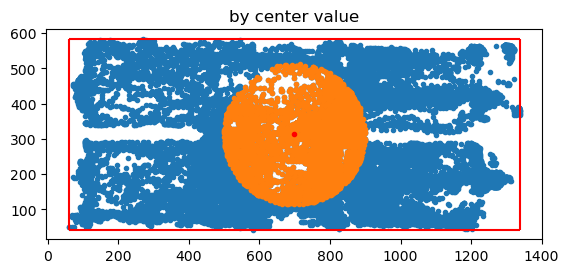

In [26]:
# by the center value
in_center = [i for i,x in enumerate(center_dist) if x < MAXDIST]
center_time = round(100 * len(in_center) / len(center_dist), 2)
print("calculate by distance from center:")
print(f'rat spent {center_time}% of the time in the center of the arena')

plt.plot(locations[:, 0, 0, :], locations[:, 0, 1, :], '.')
plt.plot(locations[in_center, 0, 0, :], locations[in_center, 0, 1, :], '.')
# find walls
xmin, xmax = np.nanmin(locations[:, 0, 0, :]), np.nanmax(locations[:, 0, 0, :])
ymin, ymax = np.nanmin(locations[:, 0, 1, :]), np.nanmax(locations[:, 0, 1, :])
sides = [xmin, xmax, ymin, ymax]
# find center
center_x, center_y = ((xmax - xmin) / 2) + xmin, ((ymax - ymin) / 2) + ymin

plt.hlines(ymin, xmin, xmax, color='r')
plt.hlines(ymax, xmin, xmax, color='r')
plt.vlines(xmin, ymin, ymax, color='r')
plt.vlines(xmax, ymin, ymax, color='r')
plt.plot(center_x, center_y, '.', color='r')
plt.gca().set_aspect("equal")

_ = plt.title('by center value')

In [31]:
MAXDIST = 150

In [32]:
node = 0

In [33]:
corner_dist = -1 * np.ones((locations.shape[0], 4))

i = 0
for x in sides[:2]:
    for y in sides[2:]:
        corner_dist[:, i] = np.sqrt((locations[:, node, 0, 0] - x) ** 2 + (locations[:, node, 1, 0] - y) ** 2)
        i += 1

min_corner_dist = np.min(corner_dist, axis=1)

calculate by distance from center:
rat spent 13.96% of the time in the center of the arena


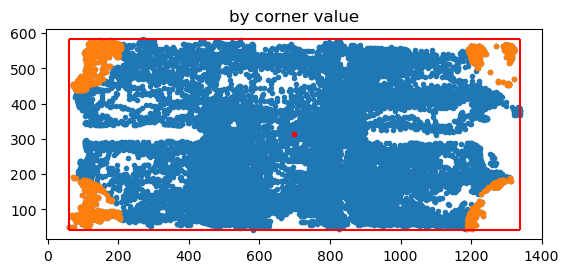

In [34]:
# by the corner value
in_center = [i for i,x in enumerate(min_corner_dist) if x < MAXDIST]
center_time = round(100 * len(in_center) / len(center_dist), 2)
print("calculate by distance from center:")
print(f'rat spent {center_time}% of the time in the center of the arena')

plt.plot(locations[:, 0, 0, :], locations[:, 0, 1, :], '.')
plt.plot(locations[in_center, 0, 0, :], locations[in_center, 0, 1, :], '.')
# find walls
xmin, xmax = np.nanmin(locations[:, 0, 0, :]), np.nanmax(locations[:, 0, 0, :])
ymin, ymax = np.nanmin(locations[:, 0, 1, :]), np.nanmax(locations[:, 0, 1, :])
sides = [xmin, xmax, ymin, ymax]
# find center
center_x, center_y = ((xmax - xmin) / 2) + xmin, ((ymax - ymin) / 2) + ymin

plt.hlines(ymin, xmin, xmax, color='r')
plt.hlines(ymax, xmin, xmax, color='r')
plt.vlines(xmin, ymin, ymax, color='r')
plt.vlines(xmax, ymin, ymax, color='r')
plt.plot(center_x, center_y, '.', color='r')
plt.gca().set_aspect("equal")

_ = plt.title('by corner value')

In [78]:
x = np.sqrt((locations[:-1, node, 0, 0] - locations[1:, node, 0, 0]) ** 2 + (locations[:-1, node, 1, 0] - locations[1:, node, 1, 0]) ** 2)

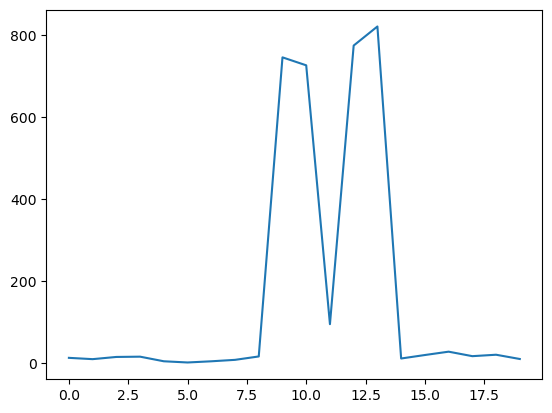

In [79]:
plt.plot(x[:20])

In [ ]:
# probs need to take out high vel things first... ! FR!

In [75]:
x = np.sqrt((locations[:10, node, 0, 0] - locations[1:11, node, 0, 0]) ** 2 + (locations[:10, node, 1, 0] - locations[1:11, node, 1, 0]) ** 2)

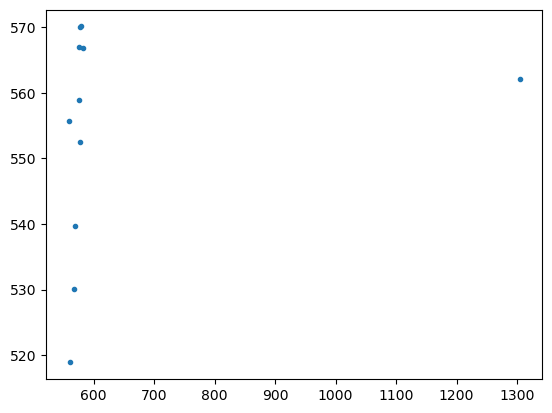

In [76]:
plt.plot(locations[:11, node, 0, 0], locations[:11, node, 1, 0], '.')

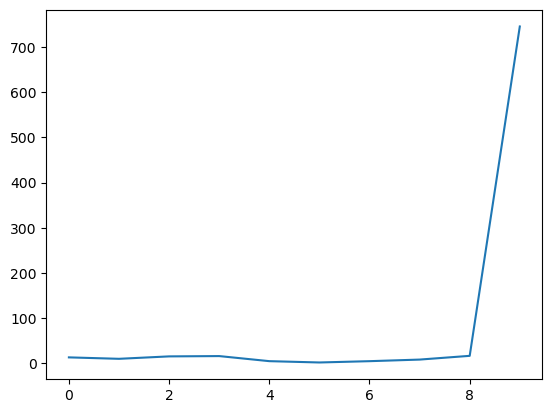

In [77]:
plt.plot(x)